<a href="https://colab.research.google.com/github/arpitdhote51/GREEN_DESTINATIONS/blob/main/GreenDestinations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

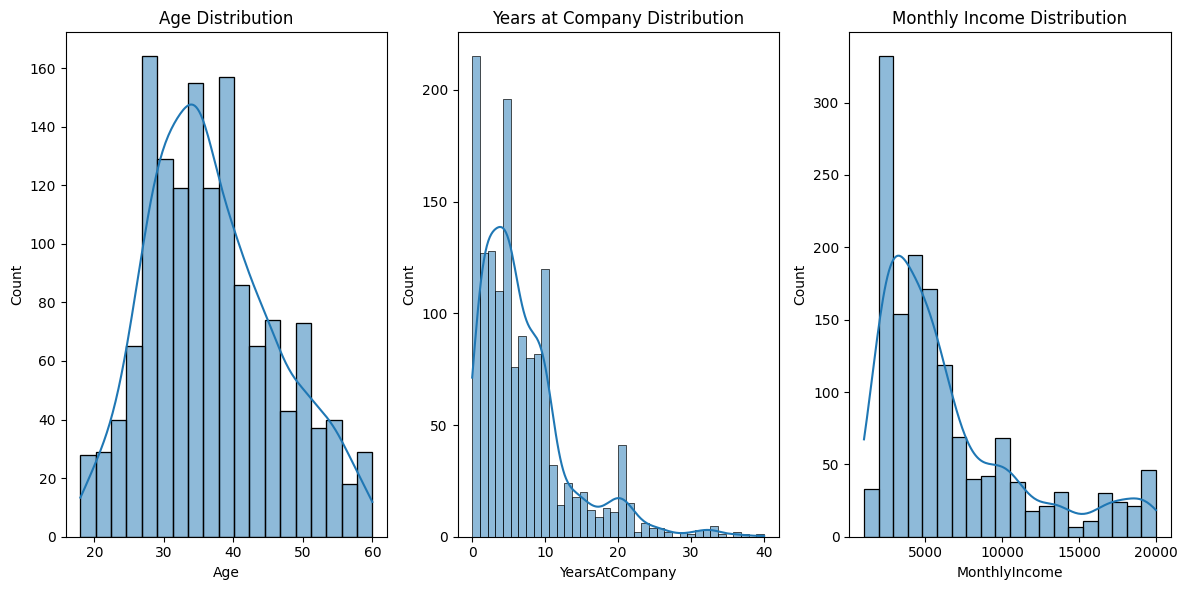

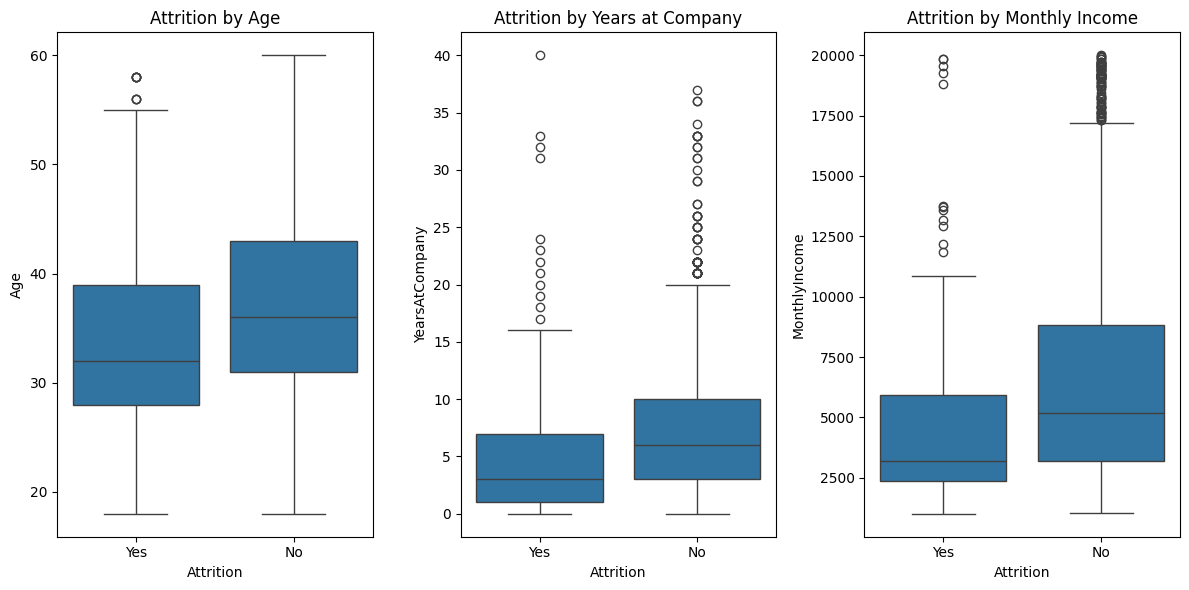


Correlation Matrix:
                 Attrition       Age  YearsAtCompany  MonthlyIncome
Attrition        1.000000 -0.159205       -0.134392      -0.159840
Age             -0.159205  1.000000        0.311309       0.497855
YearsAtCompany  -0.134392  0.311309        1.000000       0.514285
MonthlyIncome   -0.159840  0.497855        0.514285       1.000000


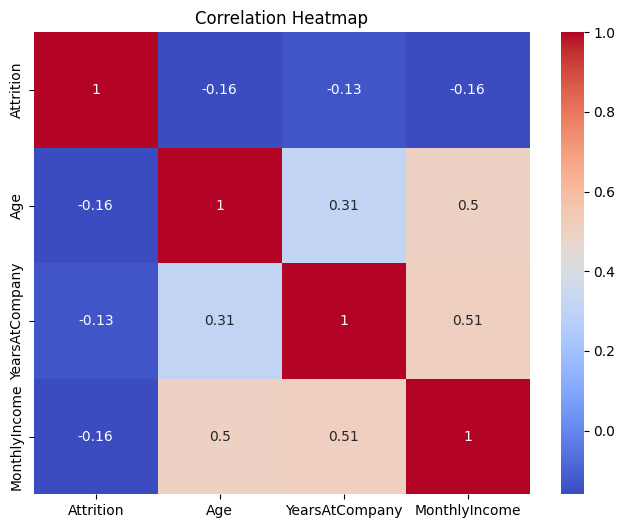

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/greendestination (1).csv')

print(df.head())
print(df.info())

# finding missing values

if df['MonthlyIncome'].isnull().any():
    df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean(), inplace=True)


# Calculating the attrition rate
attrition_rate = (df['Attrition'].value_counts(normalize=True) * 100).round(2)
print("\nAttrition Rate:\n", attrition_rate)

# Descriptive statistics of dataframe:
print("\nDescriptive Statistics:\n", df[['Age', 'YearsAtCompany', 'MonthlyIncome']].describe())

# Visualization

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['YearsAtCompany'], kde=True)
plt.title('Years at Company Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['MonthlyIncome'], kde=True)
plt.title('Monthly Income Distribution')
plt.tight_layout()
plt.show()


# Box plots to show attrition by Age, Years at Company, and Monthly Income
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Attrition by Age')

plt.subplot(1, 3, 2)
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title('Attrition by Years at Company')

plt.subplot(1, 3, 3)
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Attrition by Monthly Income')

plt.tight_layout()
plt.show()


# Correlation Analysis
df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})
correlation = df[['Attrition', 'Age', 'YearsAtCompany', 'MonthlyIncome']].corr()
print("\nCorrelation Matrix:\n", correlation)

# Heatmap visualization of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
